## Startup Profit Prediction using linear regression

In [1]:
import numpy as np
import warnings
import pandas as pd
warnings.filterwarnings('ignore') 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('50_Startups.csv')

## Exploratory Data Analysis

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [5]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


## Observations

In [7]:
# there is no null values in the dataset
# 4 values (R&D Spend,Administration,Marketing Spend and  Profit) are of numerical type
# 1 value is object type

In [8]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [9]:
# df['R&D Spend'].value_counts()

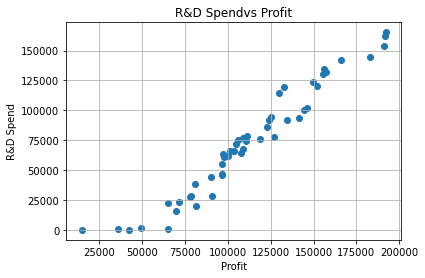

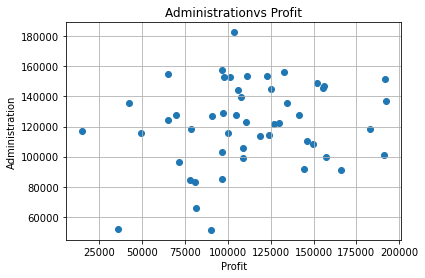

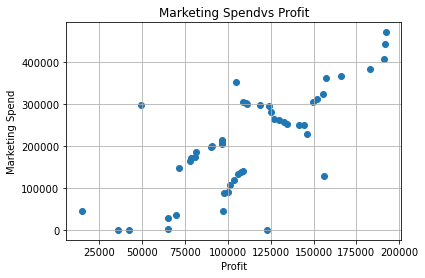

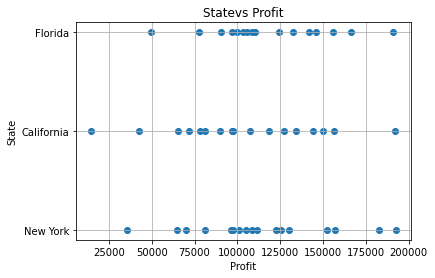

In [10]:
for i in df.columns[:-1]:
    plt.scatter(df['Profit'],df[i])
    plt.xlabel('Profit')
    plt.ylabel(i)
    plt.title(i + 'vs Profit')
    plt.grid(i)
    plt.show()

In [11]:
import seaborn as sns

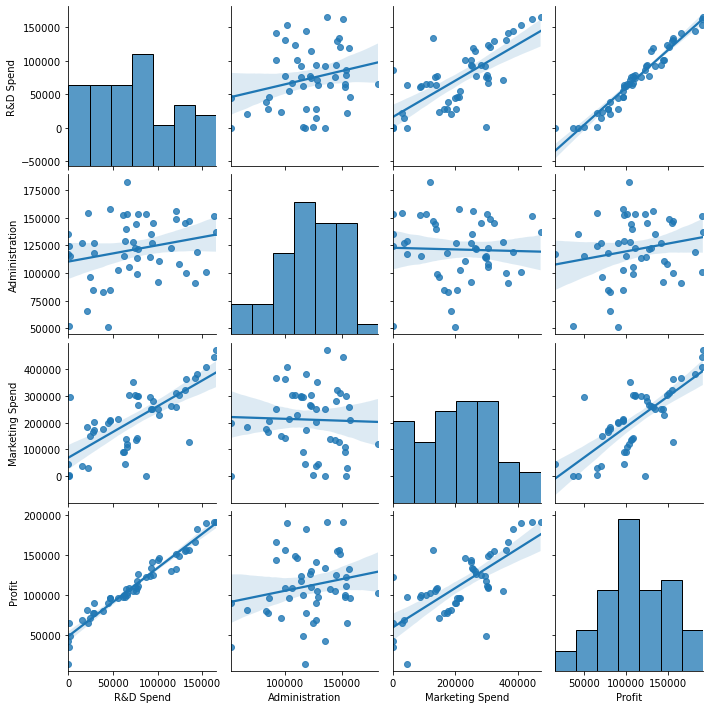

In [12]:
sns.pairplot(df,kind='reg')

## Observations

In [13]:
# R&D Spend and Marketing Spend is showing the linearity with the Profit so, they will be taken as features

In [14]:
x =df[['R&D Spend' , 'Marketing Spend']]
y=df['Profit']

In [15]:
x.head()

,R&D Spend,Marketing Spend
0,165349.20,471784.10
1,162597.70,443898.53
2,153441.51,407934.54
3,144372.41,383199.62
4,142107.34,366168.42


## 1. Splitting the Data

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
xtrain , xtest ,ytrain , ytest = train_test_split(x,y,test_size=0.25,random_state=10)

In [18]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 32 to 9
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        37 non-null     float64
 1   Marketing Spend  37 non-null     float64
dtypes: float64(2)
memory usage: 888.0 bytes


In [19]:
xtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 37 to 40
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        13 non-null     float64
 1   Marketing Spend  13 non-null     float64
dtypes: float64(2)
memory usage: 312.0 bytes


## 2. Creating the Machine Model

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
model = LinearRegression()

## 3.Training the model with Training Data

In [22]:
model.fit(xtrain,ytrain)

LinearRegression()

## 4. Evaluation

In [23]:
print('%.1f%%'%(model.score(xtest,ytest)*100))

98.7%


In [24]:
ypred=model.predict(xtest)

In [25]:
ypred

array([ 87854.07009502, 108994.97534807,  66501.98399784,  70514.82969166,
        48272.28622227, 115752.314874  , 171685.01346773,  99515.1179459 ,
       159129.98470855, 157867.63368669,  82966.20344081, 179453.30444819,
        75153.59406074])

In [26]:
ytest

37     89949.14
23    108733.99
44     65200.33
42     71498.49
47     42559.73
20    118474.03
3     182901.99
30     99937.59
7     155752.60
6     156122.51
39     81005.76
2     191050.39
40     78239.91
Name: Profit, dtype: float64

In [27]:
from sklearn.metrics import mean_absolute_error

In [28]:
print(mean_absolute_error(ytest,ypred))

3575.4956016142846


In [29]:
ypred[0]

87854.07009502062

In [30]:
100*mean_absolute_error(ytest,ypred)/ypred[0]

4.069812130214484

## Conclusion : Let's use the model because it's accuracy is more than 90%

## 5. Deployment

In [31]:
pd.to_pickle(model,'startupProfitPredictor')

In [32]:
final_model = pd.read_pickle('startupProfitPredictor')

In [33]:
final_model

LinearRegression()

In [35]:
RandD_spend=eval(input('Enter R and D Spend:'))
marketing_spend=eval(input('Enter Marketing Spend:'))
query = pd.DataFrame({'R&D Spend':[RandD_spend],'Marketing Spend':[marketing_spend]})


Enter R and D Spend: 165349
Enter Marketing Spend: 407457


In [36]:
query


,R&D Spend,Marketing Spend
0,165349,407457


In [37]:
final_model.predict(query)[0]

188866.7293076219

In [39]:
print('Profit is : %.2f$'%(final_model.predict(query)[0]))

Profit is : 188866.73$
